## Introduction

##### $\rightarrow$ Brief introduction to the purpose of this notebook.

The purpose of this notebook is to answer the question of how socioeconomic factors can have an impact on college entrance exams performance.
Using data from EdGap and the National Center for Education Statistics, we will create plots that we can interpret to answer the question.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
from sklearn.linear_model import LinearRegression

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [2]:
training_df = pd.read_csv("https://raw.githubusercontent.com/nguyenntina/Education-Inequality/main/training_dataset.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/nguyenntina/Education-Inequality/main/test_dataset.csv")

##### $\rightarrow$ Review the contents of the data set.

In [3]:
training_df.head()

,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,year,state,zip_code,school_type,school_level,average_act
0,-1.181376,2.269811,1.139345,1.663844,0.845085,2016-2017,MO,64131,Regular School,High,20.100000
1,-0.756352,0.063606,0.941067,0.560694,0.045981,2016-2017,MA,2171,Regular School,High,21.642247
2,0.681270,1.259323,-0.148323,0.403095,-0.302536,2016-2017,MI,48075,Regular School,Other,19.400000
3,-0.683741,1.633539,1.091964,0.812642,0.789593,2016-2017,PA,15221,Regular School,High,18.882784
4,0.825200,0.246644,-0.878286,-0.821921,1.751804,2016-2017,GA,30021,Regular School,High,15.732601


In [4]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rate_unemployment  5512 non-null   float64
 1   percent_college    5512 non-null   float64
 2   percent_married    5512 non-null   float64
 3   median_income      5512 non-null   float64
 4   percent_lunch      5512 non-null   float64
 5   year               5512 non-null   object 
 6   state              5512 non-null   object 
 7   zip_code           5512 non-null   int64  
 8   school_type        5512 non-null   object 
 9   school_level       5512 non-null   object 
 10  average_act        5512 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 473.8+ KB


In [5]:
test_df.head()

,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,year,state,zip_code,school_type,school_level,average_act
0,0.777131,0.301279,-0.586082,-1.152541,-0.549803,2016-2017,TX,78363,Regular School,High,20.714286
1,0.316144,-0.430953,-0.492624,-0.304162,-0.966928,2016-2017,GA,30110,Regular School,High,21.178266
2,-0.763036,2.222933,0.089884,-0.044461,0.650591,2016-2017,TX,75214,Regular School,High,19.273504
3,-0.564424,1.477154,0.569537,0.074624,0.013557,2016-2017,NC,28590,Regular School,High,19.493284
4,1.699520,0.550955,1.199211,0.214145,0.165703,2016-2017,MA,2368,Regular School,High,19.200244


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rate_unemployment  2363 non-null   float64
 1   percent_college    2363 non-null   float64
 2   percent_married    2363 non-null   float64
 3   median_income      2363 non-null   float64
 4   percent_lunch      2363 non-null   float64
 5   year               2363 non-null   object 
 6   state              2363 non-null   object 
 7   zip_code           2363 non-null   int64  
 8   school_type        2363 non-null   object 
 9   school_level       2363 non-null   object 
 10  average_act        2363 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 203.2+ KB


## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.



*   How does different school types impact ACT scores?



## Analysis

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

### Additional Step

In the school type column, we see that there are a few different categories. We should explore how these different school types can have an impact on ACT score.

##### $\rightarrow$ See what type of school types are in our data set.

In [7]:
training_df["school_type"].unique()

array(['Regular School', 'Career and Technical School',
       'Alternative School', 'Special Education School'], dtype=object)

##### $\rightarrow$ We can start off by looking at each school types average act score.

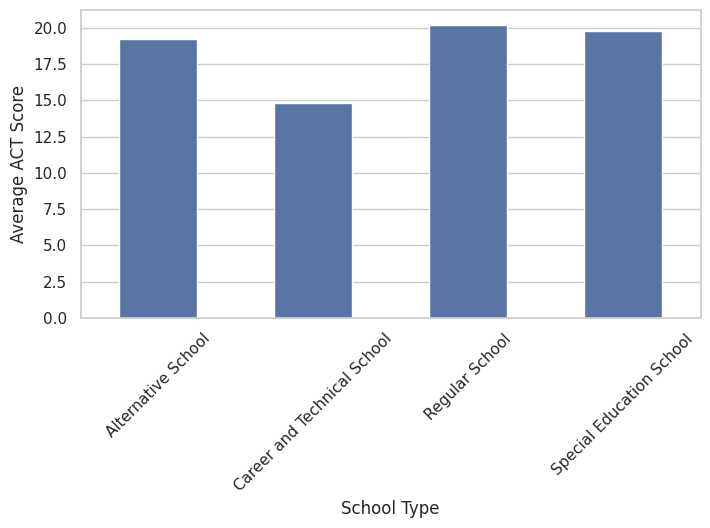

In [14]:
plt.figure(figsize=(8, 4))

average_act_by_school_type = training_df.groupby('school_type')['average_act'].mean().reset_index()
sns.barplot(data=average_act_by_school_type, x='school_type', y='average_act', width = 0.5)

plt.xlabel('School Type')
plt.ylabel('Average ACT Score')
plt.xticks(rotation=45);

Something noteciable we see is that Career and Technical School have the lowest average compared to the other schools. Regular School looks like it has the highest average closely followed by Special Education School.

##### $\rightarrow$ We can also look at a correlation matrix to see the correlation between each school type and act score.

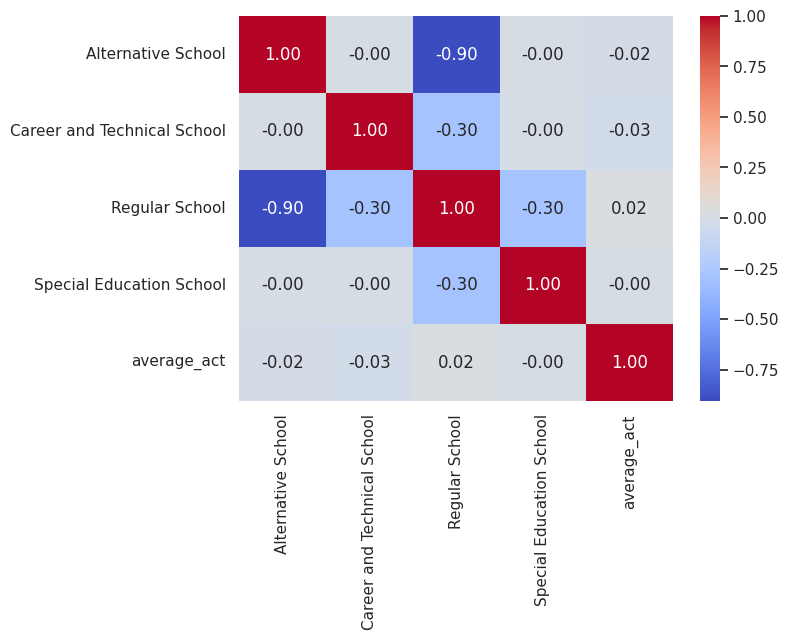

In [9]:
school_type = pd.get_dummies(training_df['school_type'])
df = pd.concat([training_df, school_type], axis=1)
school_type_cols = school_type.columns.tolist()
cols = school_type_cols + ['average_act']
df = df[cols]
correlation_matrix = df.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f");

We see that the correlation between each of the school types and act score is very close to zero indicating that it might not be the best predictor of act scores.

### Linear Regression

To start our regression, we should decide on what features we want in our model.

##### $\rightarrow$ We can individually plot our features against average act score to identify if there is a relationship.

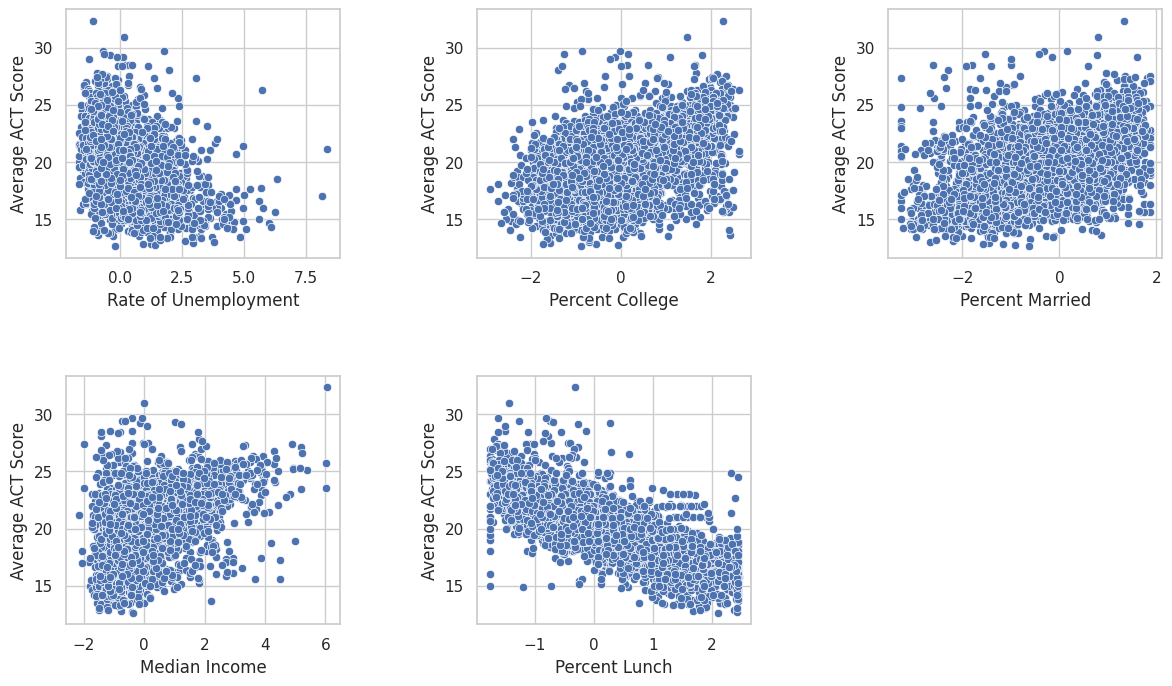

In [10]:
fig = plt.figure(figsize=(13, 8))

ax1 = plt.subplot(2, 3, 1)
sns.scatterplot(x=training_df['rate_unemployment'], y=training_df['average_act'])
ax1.set_xlabel('Rate of Unemployment')
ax1.set_ylabel('Average ACT Score')

ax2 = plt.subplot(2, 3, 2)
sns.scatterplot(x=training_df['percent_college'], y=training_df['average_act'])
ax2.set_xlabel('Percent College')
ax2.set_ylabel('Average ACT Score')

ax3 = plt.subplot(2, 3, 3)
sns.scatterplot(x=training_df['percent_married'], y=training_df['average_act'])
ax3.set_xlabel('Percent Married')
ax3.set_ylabel('Average ACT Score')

ax4 = plt.subplot(2, 3, 4)
sns.scatterplot(x=training_df['median_income'], y=training_df['average_act'])
ax4.set_xlabel('Median Income')
ax4.set_ylabel('Average ACT Score')

ax5 = plt.subplot(2, 3, 5)
sns.scatterplot(x=training_df['percent_lunch'], y=training_df['average_act'])
ax5.set_xlabel('Percent Lunch')
ax5.set_ylabel('Average ACT Score')

plt.tight_layout(pad=4);

All of the plot show that there is a relationship between the individual socioeconomic factor and act score. We can easily envision a regression line on each of the plots.

##### $\rightarrow$ We can also use a correlation map to determine what features to include in our regression.

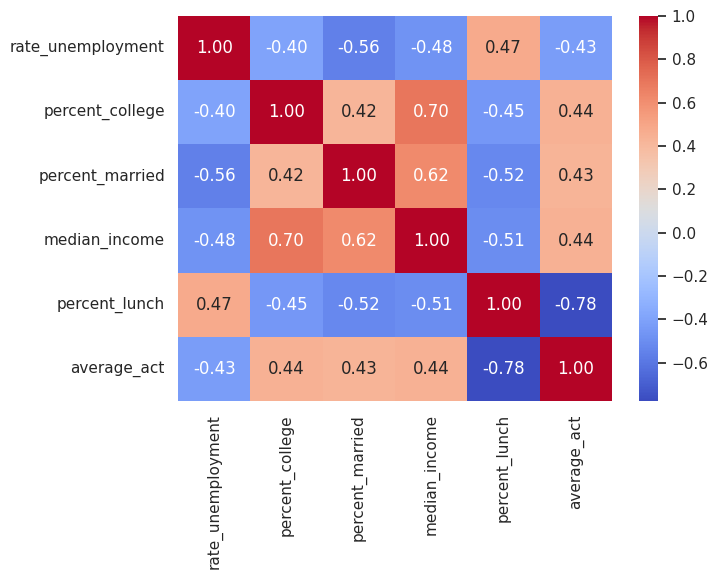

In [11]:
numerical_col = ["rate_unemployment", "percent_college", "percent_married", "median_income", "percent_lunch", "average_act"]
correlation_matrix = training_df[numerical_col].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f");

Using a correlation matrix, we can see that the variable "percent_lunch" has the highest negative correlation with act score. They all seem to have moderate correlation with act score so we will include these features in our regression.

##### $\rightarrow$ For our regression model, we will be using linear regression.

In [12]:
cols = ["rate_unemployment", "percent_college", "percent_married", "median_income", "percent_lunch"]
reg = LinearRegression().fit(training_df[cols], training_df["average_act"])
print(reg.intercept_, reg.coef_)

20.225102860931127 [-0.15227561  0.28430949 -0.02770403 -0.04674647 -1.79678799]


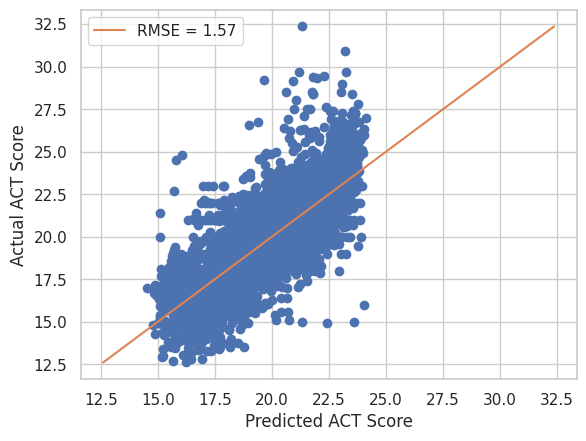

In [13]:
y_pred = reg.predict(training_df[cols])
one = np.linspace(training_df["average_act"].min(), training_df["average_act"].max(), 100)
rmse = np.sqrt(np.mean((y_pred - training_df["average_act"])**2))

fig, ax = plt.subplots()
ax.plot(y_pred, training_df["average_act"], 'o')
ax.plot(one, one, '-', label = f"RMSE = {rmse:.2f}")
ax.set_xlabel("Predicted ACT Score")
ax.set_ylabel("Actual ACT Score")
ax.legend()

While some prediction are close to the actual data, we can still see that there is some spread. There is some noticable underpredictions especially for high act scores.

## Conclusion

##### $\rightarrow$ Brief description of conclusion.

From our analysis, we learned that school type, a categorical column, doesn't contribute much to predicting act scores. By looking at individual numerical socioeconomic factors and comparing them against act score, we see that there is a relationship there which can help us predict act scores. Using linear regression with all the numerical columns, we developed a model that is able to predict act score with a rmse of 1.57. This number can be improved but we still are able to see how socioeconomic factors can contribute to act scores.